In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
import missingno as msno
import pandas_profiling
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
#解决中文显示问题
plt.rcParams["font.sans-serif"] = [u"SimHei"]
plt.rcParams["axes.unicode_minus"] = False
#解决图中负号问题
plt.rcParams['axes.unicode_minus']=False

In [48]:
origin_df=pd.read_excel('d:\\上海兴业银行样本造数.xlsx',header=0)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000001A619160>]],
      dtype=object)

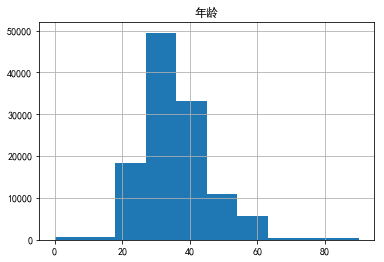

In [36]:
origin_df.hist('年龄')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000001D5C7C50>]],
      dtype=object)

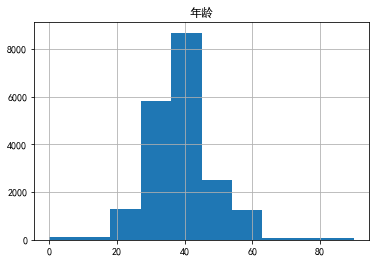

In [37]:
origin_df[origin_df['target']==1].hist('年龄')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000000013B444A8>]],
      dtype=object)

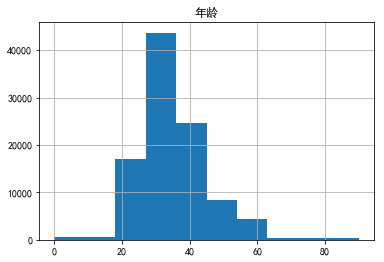

In [38]:
origin_df[origin_df['target']==0].hist('年龄')

In [39]:
def deal_age(rowdata):
    if rowdata.年龄>0 and rowdata.年龄<=17:
        return 1
    if rowdata.年龄>17 and rowdata.年龄<=25:
        return 2
    if rowdata.年龄>25 and rowdata.年龄<=35:
        return 3
    if rowdata.年龄>35 and rowdata.年龄<=45:
        return 4
    if rowdata.年龄>45 and rowdata.年龄<=60:
        return 5
    if rowdata.年龄>60 and rowdata.年龄<=90:
        return 6
    
origin_df['年龄']=origin_df.apply(deal_age,axis=1)

In [40]:
origin_df['年龄'][origin_df['target']==0].value_counts()/100000

3.0    0.48233
4.0    0.27845
2.0    0.12530
5.0    0.09420
6.0    0.00972
1.0    0.00948
Name: 年龄, dtype: float64

In [42]:
origin_df['年龄'][origin_df['target']==1].value_counts()/20000

4.0    0.49160
3.0    0.32010
5.0    0.12955
2.0    0.03720
6.0    0.01085
1.0    0.00985
Name: 年龄, dtype: float64

In [49]:
pd.qcut(origin_df['年龄'][origin_df['target']==0],6).value_counts()/100000

(30.0, 34.0]      0.18235
(26.0, 30.0]      0.18118
(-0.001, 26.0]    0.18098
(43.0, 90.0]      0.16459
(37.0, 43.0]      0.16422
(34.0, 37.0]      0.12668
Name: 年龄, dtype: float64

In [50]:
pd.qcut(origin_df['年龄'][origin_df['target']==1],6).value_counts()/20000

(38.0, 42.0]      0.19285
(-0.001, 30.0]    0.18730
(30.0, 35.0]      0.18070
(42.0, 45.0]      0.15630
(35.0, 38.0]      0.14245
(45.0, 90.0]      0.14040
Name: 年龄, dtype: float64